# Getting the provided Data from given Sources

In this Notebook it's more a "getting-startet" for personal orientation and getting familiar with provided data. <br>
It should help me getting in to the topic, and show my missing knowledge aswell as the quality of data.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
# Muss dann für Live Version wieder aktiviert werden bzw. Manuell erzeugte Logs machen
warnings.filterwarnings('ignore')
import datetime as dt

Read Oil Data From: https://www.eia.gov/dnav/pet/hist/RBRTED.htm<br>
Generated on: 03.03.2023

In [27]:
#read csv with headers from ../Data/oilprice_europe.csv
df_oil_europe = pd.read_csv('../Data/oilprice_europe.csv', header=0, index_col=0, parse_dates=True, squeeze=True, sep=';')



In [28]:
# reset the Date Index
df_oil_europe = pd.DataFrame(df_oil_europe)
df_oil_europe = df_oil_europe.reset_index()
df_oil_europe.head()

,date,price
0,"Mai 20, 1987",18.63
1,"Mai 21, 1987",18.45
2,"Mai 22, 1987",18.55
3,"Mai 25, 1987",18.60
4,"Mai 26, 1987",18.63


Date Abbreviations are in German, so we need to change the Substrings from German to English<br>
Fortunately, most of them are similar, so we only need to change some

In [29]:
# replace all substings of the german month abbreviations to the English ones, otherwise the date format is not recognized
df_oil_europe['date'] = df_oil_europe['date'].str.replace('Mai', 'May')
df_oil_europe['date'] = df_oil_europe['date'].str.replace('Okt', 'Oct')
df_oil_europe['date'] = df_oil_europe['date'].str.replace('Dez', 'Dec')
df_oil_europe['date'] = df_oil_europe['date'].str.replace('Mär', 'Mar')

In [30]:
df_oil_europe['date'].head(60)

0     May 20, 1987
1     May 21, 1987
2     May 22, 1987
3     May 25, 1987
4     May 26, 1987
5     May 27, 1987
6     May 28, 1987
7     May 29, 1987
8     Jun 01, 1987
9     Jun 02, 1987
10    Jun 03, 1987
11    Jun 04, 1987
12    Jun 05, 1987
13    Jun 08, 1987
14    Jun 09, 1987
15    Jun 10, 1987
16    Jun 11, 1987
17    Jun 12, 1987
18    Jun 16, 1987
19    Jun 17, 1987
20    Jun 18, 1987
21    Jun 19, 1987
22    Jun 22, 1987
23    Jun 23, 1987
24    Jun 24, 1987
25    Jun 25, 1987
26    Jun 26, 1987
27    Jun 29, 1987
28    Jun 30, 1987
29    Jul 01, 1987
30    Jul 02, 1987
31    Jul 03, 1987
32    Jul 06, 1987
33    Jul 07, 1987
34    Jul 08, 1987
35    Jul 09, 1987
36    Jul 10, 1987
37    Jul 13, 1987
38    Jul 14, 1987
39    Jul 15, 1987
40    Jul 16, 1987
41    Jul 17, 1987
42    Jul 20, 1987
43    Jul 21, 1987
44    Jul 22, 1987
45    Jul 23, 1987
46    Jul 24, 1987
47    Jul 27, 1987
48    Jul 28, 1987
49    Jul 29, 1987
50    Jul 30, 1987
51    Jul 31, 1987
52    Aug 03

In [31]:
# transform the date column to datetime format
df_oil_europe['date'] = pd.to_datetime(df_oil_europe['date'], format='%b %d, %Y')

ValueError: time data 'May 20, 1987' does not match format '%b %d, %Y' (match)

In [ ]:
df_oil_europe

,date,price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9076,2023-02-21,82.14
9077,2023-02-22,79.55
9078,2023-02-23,82.08
9079,2023-02-24,82.31


In [ ]:
# set date as index for easier plotting
df_oil_europe = df_oil_europe.set_index('date')

<AxesSubplot:xlabel='date'>

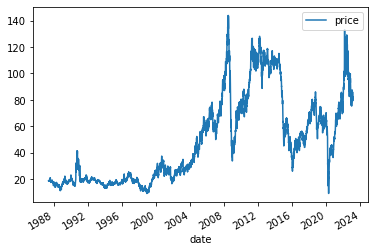

In [ ]:
df_oil_europe.plot()

# Industrial electricity prices in the IEA (QEP 5.3.1) Data Load

In [ ]:
df_industrial_electricy_iea = pd.read_csv('../Data/Industrial_electricity_prices_IEA.csv', header=0, index_col=0, parse_dates=True, squeeze=True, sep=';')

In [ ]:
df_industrial_electricy_iea.reset_index(inplace=True)

In [ ]:
df_industrial_electricy_iea['Year'] = pd.to_datetime(df_industrial_electricy_iea['Year'], format='%Y')

In [ ]:
df_industrial_electricy_iea = df_industrial_electricy_iea.set_index('Year')

Scheint hier noch ein Problem mit den Strings zu geben, am besten noch anpassen

In [ ]:
# remove white spaces in column names if they are in the begginning or end of the string
df_industrial_electricy_iea.columns = df_industrial_electricy_iea.columns.str.strip()
# replace white spaces in column names with underscore
df_industrial_electricy_iea.columns = df_industrial_electricy_iea.columns.str.replace(' ', '_')
df_industrial_electricy_iea.columns

Index(['Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal',
       'Spain', 'Sweden', 'United_Kingdom', 'Australia', 'Canada',
       'Czech_Republic', 'Hungary', 'Japan', 'Korea', 'New_Zealand', 'Norway',
       'Poland', 'Slovakia', 'Switzerland', 'Turkey', 'USA', 'IEA_median',
       'UK_relative_to_IEA_median%', 'UK_relative_to_IEA_rank',
       'UK_relative_to_G7_rank'],
      dtype='object')

<AxesSubplot:xlabel='Year'>

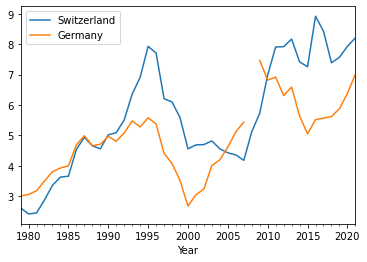

In [ ]:
df_industrial_electricy_iea[['Switzerland','Germany']].plot()

Warum die Lücke? Kann/darf hier ein Interpolate verwendet werden?

In [ ]:
# import the csv file Zeitreihe_Import_Export_pro_Land from ../Data
df_import_export = pd.read_csv('../Data/Zeitreihe_Import_Export_pro_Land.csv', header=0, index_col=0, parse_dates=True, squeeze=True, sep=';')
df_import_export.head()
df_import_export = df_import_export.drop(df_import_export.columns[2:11], axis=1)
df_import_export = df_import_export.reset_index()

In [ ]:
import locale
locale.setlocale(locale.LC_TIME, 'de_DE')
date_format = '%B %Y'
df_import_export['Datum'] = pd.to_datetime(df_import_export['Datum'], format=date_format)

In [ ]:
df_import_export.dtypes

Deutschland_EINFUHR        int64
Frankreich_EINFUHR         int64
Italien_EINFUHR            int64
Oesterreich_EINFUHR        int64
Liechtenstein_EINFUHR      int64
TOTAL_EINFUHR              int64
Deutschland_AUSFUHR        int64
Frankreich_AUSFUHR         int64
Italien_AUSFUHR            int64
Oesterreich_AUSFUHR        int64
Liechtenstein_AUSFUHR      int64
TOTAL_AUSFUHR              int64
Unnamed: 13              float64
Unnamed: 14              float64
Unnamed: 15              float64
Unnamed: 16              float64
Unnamed: 17              float64
Unnamed: 18              float64
Unnamed: 19              float64
Unnamed: 20              float64
dtype: object

In [ ]:
df_import_export = df_import_export.set_index('Datum')

<AxesSubplot:xlabel='Datum'>

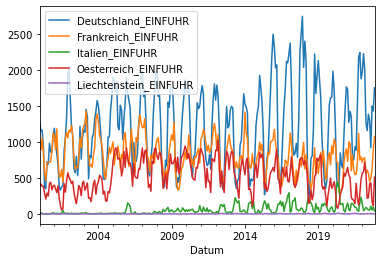

In [ ]:
df_import_export[['Deutschland_EINFUHR','Frankreich_EINFUHR','Italien_EINFUHR','Oesterreich_EINFUHR','Liechtenstein_EINFUHR']].plot()
